In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from HOwDI.util import create_db_engine

from HOwDI.postprocessing.input_scenarios import (
    get_monte_carlo_info,
    cluster_monet_carlo_info,
)

In [2]:
engine = create_db_engine(
    "sqlite:///C:/Users/bpeco/Box/h2@scale/h2_model/trial0.sqlite"
)
mc_info = get_monte_carlo_info(
    uuid="401ee3ee-e235-41dc-a399-5adaa7e58cd7",
    engine=engine,
)

In [3]:
data = {n: cluster_monet_carlo_info(mc_info, n_clusters=n) for n in range(2,60)}

c:\Users\bpeco\miniconda3\envs\HOwDI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\bpeco\miniconda3\envs\HOwDI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bpeco\miniconda3\envs\HOwDI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bpeco\miniconda3\envs\HOwDI\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

In [4]:
inertia = pd.concat(
    [
        distortions.rename(columns={"Inertia": n})
        for n, (_, distortions) in data.items()
    ], axis=1
)

<AxesSubplot:>

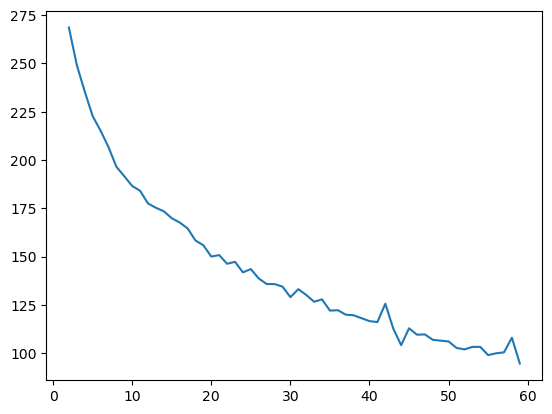

In [9]:
inertia.max().T.plot()

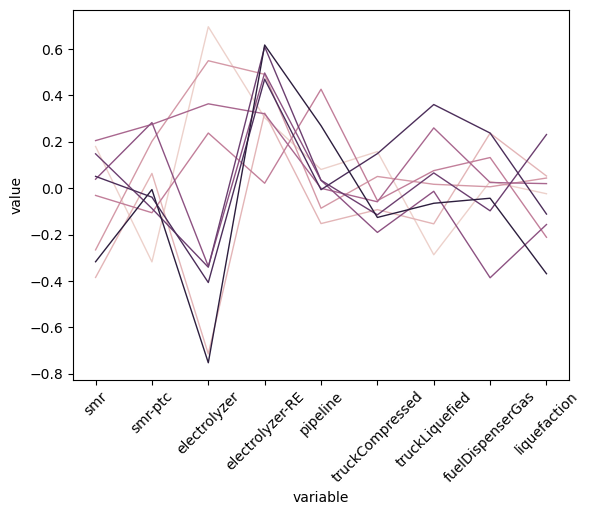

In [6]:
clustered_data = data[9][0]
value_column = "average/FuelStation"
melt = pd.melt(
    clustered_data[clustered_data["bin"] == 3],
    id_vars=[value_column, "bin", "cluster"],
)

fix, ax = plt.subplots()
g = sns.lineplot(
    x="variable",
    y="value",
    data=melt,
    hue="cluster",
    # units="cluster",
    # style="cluster",
    estimator=None,
    lw=1,
)
plt.xticks(rotation=45)
ax.legend().remove()

In [7]:
clustered_data[["bin","average/FuelStation"]].groupby("bin").mean().to_dict()

{'average/FuelStation': {0: 4.292339946796719,
  1: 3.6528698153698147,
  2: 4.116677040883792,
  3: 4.414980692918193,
  4: 3.8827614814814817}}